In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv("./train.csv")
df_train_on = df_train[df_train["target"] == 1]
df_train_off = df_train[df_train["target"] == 0]
display(df_train.head())
display(df_train_on.head())
display(df_train_off.head())


,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0


,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
5,20,80,0,60,1,50,1,198578.9451,1.005423,143,1,0,33,1
7,23,58,0,103,0,45,0,164019.0477,0.915698,136,1,1,210,1


,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0
6,21,67,0,582,0,35,1,268027.6685,0.752896,134,0,0,207,0
9,25,61,0,80,0,25,0,263893.6535,0.829171,136,1,0,213,0
10,26,77,1,553,1,50,0,258656.0382,0.882218,140,1,0,209,0


In [5]:
display(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   anaemia                   1000 non-null   int64  
 3   creatinine_phosphokinase  1000 non-null   int64  
 4   diabetes                  1000 non-null   int64  
 5   ejection_fraction         1000 non-null   int64  
 6   high_blood_pressure       1000 non-null   int64  
 7   platelets                 1000 non-null   float64
 8   serum_creatinine          1000 non-null   float64
 9   serum_sodium              1000 non-null   int64  
 10  sex                       1000 non-null   int64  
 11  smoking                   1000 non-null   int64  
 12  time                      1000 non-null   int64  
 13  target                    1000 non-null   int64  
dtypes: float6

None

In [16]:
print(df_train.shape)
print(df_train_off.shape)
print(df_train_on.shape)

(1000, 14)
(802, 14)
(198, 14)


In [10]:
display(df_train.corr())

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
id,1.000000,-0.009706,0.047117,-0.032510,-0.016481,-0.002869,0.010901,0.076857,-0.029488,-0.054380,0.036229,-0.024793,-0.005215,0.028046
age,-0.009706,1.000000,-0.081584,0.073761,-0.292931,0.167132,0.049607,-0.132735,0.018757,0.086147,0.037417,-0.024095,-0.037797,0.115899
anaemia,0.047117,-0.081584,1.000000,-0.060977,0.126494,0.223001,-0.026679,0.121458,0.014769,0.181867,-0.179634,-0.174311,-0.011305,-0.032421
creatinine_phosphokinase,-0.032510,0.073761,-0.060977,1.000000,-0.069392,-0.009976,0.021842,-0.093147,0.071342,0.042080,-0.012281,0.010973,-0.093119,0.122632
diabetes,-0.016481,-0.292931,0.126494,-0.069392,1.000000,0.051338,0.047725,0.074693,-0.045613,-0.113858,-0.072535,-0.119327,0.020410,0.031315
ejection_fraction,-0.002869,0.167132,0.223001,-0.009976,0.051338,1.000000,0.082760,0.021659,0.063066,0.103852,-0.152956,0.014769,-0.101403,-0.026801
high_blood_pressure,0.010901,0.049607,-0.026679,0.021842,0.047725,0.082760,1.000000,0.014334,-0.019452,-0.051340,0.027694,0.141865,-0.096224,0.147968
platelets,0.076857,-0.132735,0.121458,-0.093147,0.074693,0.021659,0.014334,1.000000,-0.107409,-0.021707,-0.111318,-0.004204,0.060992,-0.055184
serum_creatinine,-0.029488,0.018757,0.014769,0.071342,-0.045613,0.063066,-0.019452,-0.107409,1.000000,-0.097223,-0.040661,-0.054871,-0.154102,0.221103
serum_sodium,-0.054380,0.086147,0.181867,0.042080,-0.113858,0.103852,-0.051340,-0.021707,-0.097223,1.000000,-0.064175,0.002493,-0.032669,-0.091057


In [19]:
display(df_train.describe())
display(df_train_on.describe())
display(df_train_off.describe())

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,999.734000,57.632000,0.41600,605.359000,0.270000,36.691000,0.237000,278330.242337,1.030258,136.841000,0.755000,0.25600,149.560000,0.198000
std,578.002214,9.875328,0.49314,971.937382,0.444182,11.037089,0.425455,79543.675235,0.704616,3.405777,0.430302,0.43664,77.381072,0.398692
min,0.000000,39.000000,0.00000,23.000000,0.000000,14.000000,0.000000,138173.134500,0.629178,116.000000,0.000000,0.00000,4.000000,0.000000
25%,496.750000,50.000000,0.00000,93.000000,0.000000,30.000000,0.000000,256629.434900,0.798218,135.000000,1.000000,0.00000,84.500000,0.000000
50%,1007.500000,58.000000,0.00000,255.000000,0.000000,35.000000,0.000000,267025.054700,0.844389,136.500000,1.000000,0.00000,185.000000,0.000000
75%,1512.250000,61.000000,1.00000,582.000000,1.000000,40.000000,0.000000,279943.418975,0.956294,139.000000,1.000000,1.00000,213.000000,0.000000
max,1998.000000,85.000000,1.00000,7861.000000,1.000000,70.000000,1.000000,824131.916700,8.994597,146.000000,1.000000,1.00000,285.000000,1.000000


,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,198.000000,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0
mean,1032.343434,59.934343,0.383838,845.121212,0.29798,36.095960,0.363636,269500.320598,1.343647,136.217172,0.722222,0.161616,125.777778,1.0
std,583.587821,12.298353,0.487552,1270.468220,0.45853,10.839666,0.482265,77222.368195,1.184723,5.041786,0.449039,0.369031,79.077685,0.0
min,0.000000,41.000000,0.000000,54.000000,0.00000,14.000000,0.000000,138173.134500,0.644025,116.000000,0.000000,0.000000,10.000000,1.0
25%,532.500000,49.000000,0.000000,129.000000,0.00000,30.000000,0.000000,245924.126850,0.840683,134.000000,0.000000,0.000000,43.000000,1.0
50%,1095.000000,58.000000,0.000000,579.500000,0.00000,35.000000,0.000000,270778.422650,0.951325,137.000000,1.000000,0.000000,115.000000,1.0
75%,1557.500000,68.000000,1.000000,835.000000,1.00000,38.000000,1.000000,280363.971450,1.447136,140.000000,1.000000,0.000000,205.000000,1.0
max,1996.000000,85.000000,1.000000,7861.000000,1.00000,70.000000,1.000000,817402.933100,8.994597,146.000000,1.000000,1.000000,278.000000,1.0


,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.0
mean,991.683292,57.063591,0.423940,546.165835,0.263092,36.837905,0.205736,280510.198078,0.952887,136.995012,0.763092,0.279302,155.431421,0.0
std,576.697645,9.099242,0.494489,873.775010,0.440587,11.087042,0.404490,80003.521205,0.493703,2.845146,0.425451,0.448936,75.866289,0.0
min,11.000000,39.000000,0.000000,23.000000,0.000000,15.000000,0.000000,140648.818900,0.629178,130.000000,0.000000,0.000000,4.000000,0.0
25%,490.500000,50.000000,0.000000,84.000000,0.000000,25.000000,0.000000,258251.879150,0.789294,136.000000,1.000000,0.000000,90.000000,0.0
50%,974.000000,58.000000,0.000000,232.000000,0.000000,35.000000,0.000000,266543.111550,0.832722,136.000000,1.000000,0.000000,187.000000,0.0
75%,1498.750000,61.000000,1.000000,582.000000,1.000000,43.750000,0.000000,279672.063325,0.920312,139.000000,1.000000,1.000000,213.000000,0.0
max,1998.000000,85.000000,1.000000,5882.000000,1.000000,60.000000,1.000000,824131.916700,5.644760,145.000000,1.000000,1.000000,285.000000,0.0


(array([ 76.,  49., 171.,  77., 267.,  30.,  85.,   1.,  41.,   5.]),
 array([39. , 43.6, 48.2, 52.8, 57.4, 62. , 66.6, 71.2, 75.8, 80.4, 85. ]),
 <BarContainer object of 10 artists>)

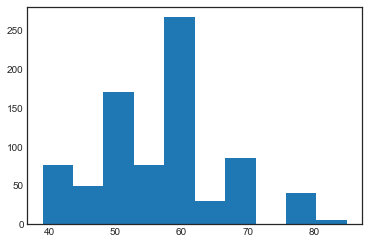

In [18]:
plt.style.use("seaborn-white")
#plt.hist(df_train["age"])
plt.hist(df_train_off["age"])
#plt.hist(df_train_on["age"])




(array([ 68.,  38.,  93.,  91.,  51.,  26.,  75., 260.,  60.,  40.]),
 array([  4. ,  32.1,  60.2,  88.3, 116.4, 144.5, 172.6, 200.7, 228.8,
        256.9, 285. ]),
 <BarContainer object of 10 artists>)

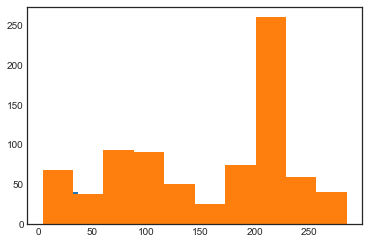

In [6]:
plt.style.use("seaborn-white")
#plt.hist(df_train["time"])
plt.hist(df_train_on["time"])
plt.hist(df_train_off["time"])


In [10]:
print(pd.value_counts(df_train["sex"]))
print(pd.value_counts(df_train["smoking"]))
print(pd.value_counts(df_train["anaemia"]))
print(pd.value_counts(df_train["diabetes"]))
print(pd.value_counts(df_train["high_blood_pressure"]))


1    755
0    245
Name: sex, dtype: int64
0    744
1    256
Name: smoking, dtype: int64
0    584
1    416
Name: anaemia, dtype: int64
0    730
1    270
Name: diabetes, dtype: int64
0    763
1    237
Name: high_blood_pressure, dtype: int64


In [12]:
display(df_train["creatinine_phosphokinase"].mean())
display(df_train_on["creatinine_phosphokinase"].mean())
display(df_train_off["creatinine_phosphokinase"].mean())

605.359

845.1212121212121

546.1658354114713

In [13]:
display(df_train["ejection_fraction"].mean())
display(df_train_on["ejection_fraction"].mean())
display(df_train_off["ejection_fraction"].mean())

36.691

36.0959595959596

36.83790523690773

In [14]:
display(df_train["platelets"].mean())
display(df_train_on["platelets"].mean())
display(df_train_off["platelets"].mean())

278330.24233699974

269500.3205979798

280510.19807805464

In [15]:
display(df_train["serum_creatinine"].mean())
display(df_train_on["serum_creatinine"].mean())
display(df_train_off["serum_creatinine"].mean())

1.0302576547670006

1.34364678619192

0.9528872706995014

In [16]:
display(df_train["serum_sodium"].mean())
display(df_train_on["serum_sodium"].mean())
display(df_train_off["serum_sodium"].mean())

136.841

136.2171717171717

136.99501246882792